In [1]:
# setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


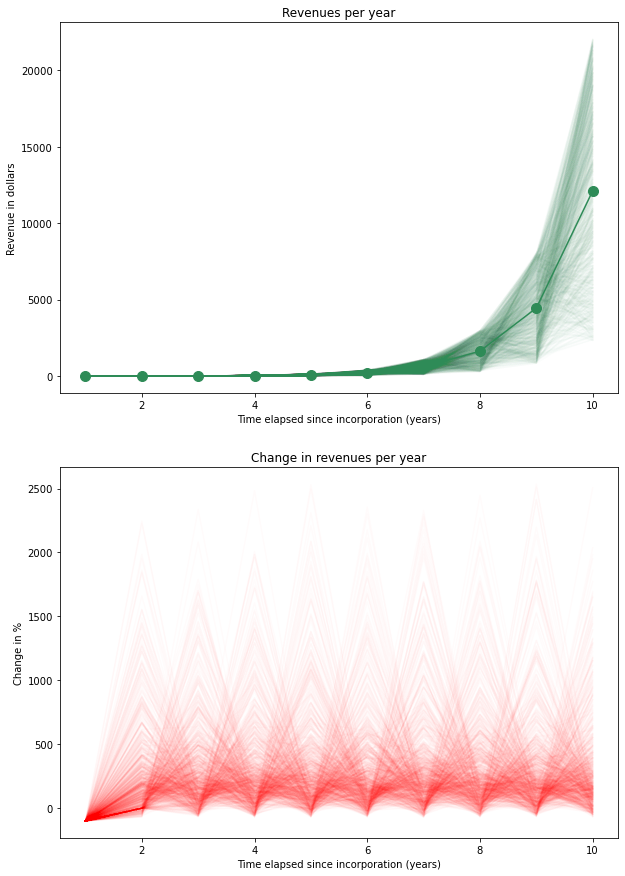

In [100]:
# set seed
np.random.seed(666)

# periods
p = 11 

# sub-population size
s = 1000 #number of companies in a set

e = [] #the first type of start-up

for i in range(s):
    for j in np.arange(1, p, 1): #can use linspace here
        r = np.exp(j) * np.random.uniform(0.1, 1) #uniform is for noise to the data
        e.append([i, j, r]) #append data of each company, e - lable, j - time
        
        
e = pd.DataFrame(e, columns=['i', 'j', 'r']) # r - revenue. when you pass a list there are no colomns included. So we have to pass coloms as well.


# inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100

df = pd.concat([e], axis=0, ) #axis=0 - with respect to the rows


# create figure
fig = plt.figure(figsize=(10, 15))

# add chart
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# plot data
x = np.arange(1, 11, 1)

for i in range(s):
    y_obs = df.loc[(df['i'] == i)]['r'].values
    ax1.plot(x, y_obs, color='seagreen', alpha=0.015)
    

    
y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]

ax1.plot(x, y_e, color='seagreen', alpha=1, marker='o',markersize=10)
ax1.set_title('Revenues per year')
# axes
ax1.set_xlabel('Time elapsed since incorporation (years)')
ax1.set_ylabel('Revenue in dollars')

    
df['change']=df['r'].pct_change()
df['change']=df['change']*100

for j in range(s):
    if (j%10==1):
        df.loc[j , 'change'] = 0
        
for i in range(s):
    y_obs2 = df.loc[(df['i'] == i)]['change'].values
    ax2.plot(x, y_obs2, color='red', alpha=0.015)

# axes
ax2.set_xlabel('Time elapsed since incorporation (years)')
ax2.set_ylabel('Change in %')
ax2.set_title ('Change in revenues per year')


#ax2.plot(x, y, color='red', alpha=1, marker='o',markersize=10)


DF1 = df
for i in range(s):
    if (i%10==0):
        DF1.drop(i, axis=0, inplace=True)

#DF1.loc[:, 'change_mean'] = DF1.groupby('i')['change'].transform(np.mean)
#DF1.loc[1000] = [0,1,0,0,0]

#for i in range(s):
#    y_obs3 = DF1.loc[(DF1['i'] == i)]['change_mean'].values
#    ax2.plot(x, y_obs3, color='seagreen', alpha=0.015)